In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt

### Missing Data

In this section we discuss the concept of *missing data*.  This discussion aims to explore, but not entirely answer, the following questions:

+ What is missing data?
+ What data types comprise missing data?
+ How does missing data effect our understanding of the dataset?
+ How can we identify missing data?
+ How should we deal with missing data?

#### What is missing data?

Missing data can have many forms.  It may be indicated by a NumPy NaN (not a number) object or a well-defined string that symbolizes missing data (e.g. 'NA' meaning Not Available).  In the case of legacy datasets, it may be a specifi number, like $999$ or $-1$ that the data collectors decided to use to take the place of missing data.  In the Chicago datasets we will use as examples, the string 'NDA' is used to indicate missing data.  Missing data could also take the form of an empty cell in a spreadsheet.

Personally, I have seen missing data take the following forms: NaN, 'NA', None, '?', 'NDA', -999, -1, and even 0.0.

#### What data types comprise missing data?

As mentioned above, virtually every scalar data type has the potential to be used to represent missing data.

When working with Pandas, missing data could be generated depending on the function applied and the parameters passed.  We have seen examples of this in the Section 3.0 Notes.  In those examples, the missing data was of the form NaN.

#### NaN and None Values

NaN stands for Not a Number.  NaN values are defined to be floats.

The built-in Python None value has its own data type NoneType.

##### Example 1

In [3]:
type(np.nan)

float

In [4]:
type(None)

NoneType

$\Box$

Working with NaN and None values is relatively nice, compared to other sneakier missing values.  One reason for this is that both NaN and None values are easily detected using the *isnull* method.

##### Example 2

In [2]:
df = pd.DataFrame({'A':[1,2,np.nan,4, None], 'B':[9,np.nan,8,7,5]})
df

,A,B
0,1.0,9.0
1,2.0,NaN
2,NaN,8.0
3,4.0,7.0
4,NaN,5.0


In [12]:
df.isnull()

,A,B
0,False,False
1,False,True
2,True,False
3,False,False
4,True,False


In [11]:
df[df['A'].isnull()]

,A,B
2,NaN,8.0
4,NaN,5.0


In [13]:
df[df['B'].isnull()]

,A,B
1,2.0,NaN


The *notnull* method is the negation of isnull.

In [15]:
df.notnull()

,A,B
0,True,True
1,True,False
2,False,True
3,True,True
4,False,True


In [16]:
df[df['A'].notnull()]

,A,B
0,1.0,9.0
1,2.0,NaN
3,4.0,7.0


$\Box$

#### How does missing data effect our understanding of the dataset?

Missing data can corrupt computations, as is illustrated in the next example.

##### Example 3

In [4]:
np.nan + 2 + 3

nan

In [5]:
2*np.nan

nan

In [3]:
A = np.array([1,2,3,np.nan,4])
A

array([ 1.,  2.,  3., nan,  4.])

In [4]:
A.sum()

nan

In [5]:
A.mean()

nan

$\Box$

Luckily, Pandas statistics functions are written so that they skip over NaNs.

##### Example 4

In [19]:
df

,A,B
0,0,4.224869
1,1,5.000322
2,2,5.316967
3,3,6.627138
4,4,3.578527
5,5,4.976813
6,6,3.874758
7,7,6.248241
8,8,5.665298
9,9,3.899857


In [7]:
df.sum(axis = 0)

A     7.0
B    29.0
dtype: float64

In [21]:
df['B'].mean()

7.25

If so inclined, we can include the NaNs in the computation by passing skipna = False.  

In [22]:
df.sum(axis = 0, skipna = False)

A   NaN
B   NaN
dtype: float64

In [23]:
df['B'].mean(skipna = False)

nan

$\Box$

NaNs are the best case for missing data.  If instead, we have '?' as the symbol used for missing data, attempting to sum a column leads to an error.

##### Example 5

In [8]:
df1 = pd.DataFrame({'AA':[1,2,'?',4, '?'], 'BB':[9,'?',8,7,5]})
df1

,AA,BB
0,1,9
1,2,?
2,?,8
3,4,7
4,?,5


Attempting to run this code

df1['AA'].sum()

gives the error

TypeError: unsupported operand type(s) for +: 'int' and 'str'.

We will learn how to replace non-standard missing value symbols in a later notebook.

$\Box$

Even worse, we may have $-999$ as our symbol for missing values.  This corrupts our computations in a way that is hard to identify.

##### Example 6

In [9]:
df2 = pd.DataFrame({'AAA':[1,2,-999,4, -999], 'BBB':[9,-999,8,7,5]})
df2

,AAA,BBB
0,1,9
1,2,-999
2,-999,8
3,4,7
4,-999,5


In [30]:
df2.mean(axis = 0)

AAA   -398.2
BBB   -194.0
dtype: float64

$\Box$

An even worse situation is one where missing values are identified with 0 or 0.0.

##### Example 7

In [10]:
df3 = pd.DataFrame({'AAAA':[1,2,0,4, 0], 'BBBB':[9,0,8,7,5]})
df3

,AAAA,BBBB
0,1,9
1,2,0
2,0,8
3,4,7
4,0,5


In [11]:
df3.mean(axis = 0)

AAAA    1.4
BBBB    5.8
dtype: float64

This may seem not too bad.  After all, the missing values don't effect this computation.  But the bigger issue here is that the data is not truely representative.

$\Box$

#### How can we identify missing data?

We saw above in Example 2 that the *isnull* method can be used to identify NaN values.  But what about '?' and those sneaky missing values like -999 and the extremely hard to spot 0.0?

There are no easy answers here.  As a data scientist, your best defense is to get to know your data.  

Read the documentation!  Is there a readme file for your data?  If so, then it may indicate what values were used to indicate missing values.

If you suspect that a sneaky value is being used to represent missing data, a quick visualization of the values in a column may provide conclusive evidence.  This is illustrated in the next example.

##### Example 8

We create a DataFrame with the sneaky missing value -1.0.

In [14]:
df = pd.DataFrame({'A': range(50), 'B':np.random.normal(size = (50,))+5})
for i in np.random.choice(range(50), size = (5,), replace = False):
    df.loc[i, 'B'] = -1.0
df.iloc[:10]

,A,B
0,0,4.224869
1,1,5.000322
2,2,5.316967
3,3,6.627138
4,4,3.578527
5,5,4.976813
6,6,3.874758
7,7,6.248241
8,8,5.665298
9,9,3.899857


This sneaky missing value is corrupting our computations.

In [15]:
df['B'].mean()

4.487403835776238

In [16]:
df[df['B'] != -1]['B'].mean()

5.097115373084709

Now, suppose that you suspect that -1.0 is being used as a symbol to indicate a missing value.  We will learn to make these plots in the next notebook.  For now, we use this plot to identify the potential missing value of -1.0.

<AxesSubplot:xlabel='B', ylabel='Frequency'>

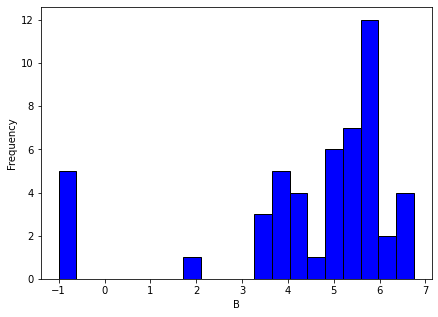

In [17]:
#Define figure object
fig=plt.figure(figsize=(7,5))
#define axes object
ax=fig.add_subplot(1,1,1)
#Label the axes
ax.set_xlabel("B")
ax.set_ylabel("Frequency")
#Define the plot
df['B'].plot.hist(ax=ax, edgecolor="black", bins = 20, alpha=1.0, color="b")

Notice how all of the values, except -1.0 are clumped together on the right and how there is a large gap between -1.0 and the rest of the values in B.  This provides evidence that -1.0 is being used to stand for missing data.

$\Box$

#### How should we deal with missing data?

There is no easy answer here.  The wrong answer is to deal with missing data using a one-size-fits-all approach.  The answer *depends on the application*.

In some cases, it may make sense to drop all rows that contain missing data.  In this case, the *dropna* method is helpful.

##### Example 9

In [18]:
df

,A,B
0,0,4.224869
1,1,5.000322
2,2,5.316967
3,3,6.627138
4,4,3.578527
5,5,4.976813
6,6,3.874758
7,7,6.248241
8,8,5.665298
9,9,3.899857


In [4]:
df.dropna()

,A,B
0,1.0,9.0
3,4.0,7.0


$\Box$

It may make sense, given the application, that filling in missing data is the best approach.  In this case, the *fillna* method is helpful.

##### Example 10

Suppose that we decide that filling all NaNs with 0 is the best approach.

In [2]:
df = pd.DataFrame({'X':[1,2,np.nan,4,5], 'Y':[6,np.nan,8,np.nan,10], 'Z':[11,12,13,14,np.nan]})
df1 = df
df2 = df
df3 = df
df1

,X,Y,Z
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,NaN,14.0
4,5.0,10.0,NaN


In [15]:
df1 = df1.fillna(0)
df1

,X,Y,Z
0,1.0,6.0,11.0
1,2.0,0.0,12.0
2,0.0,8.0,13.0
3,4.0,0.0,14.0
4,5.0,10.0,0.0


$\Box$

##### Example 10

Using a dict, we can specify different fill values for each column.

In [3]:
df2

,X,Y,Z
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,NaN,14.0
4,5.0,10.0,NaN


In [4]:
df2 = df2.fillna(value = {'X':df2.X.max(), 'Z':df2.Z.mean()})

In [5]:
df2

,X,Y,Z
0,1.0,6.0,11.0
1,2.0,NaN,12.0
2,5.0,8.0,13.0
3,4.0,NaN,14.0
4,5.0,10.0,12.5


$\Box$

If the missing values are not NaNs, we may have to work a little harder.  

##### Example 11

In [22]:
df = pd.DataFrame({'X':[1,2,'?',4, '?'], 'Y':[9,'?',8,7,5], 'Z':[11,12,13,14,'?']})
df

,X,Y,Z
0,1,9,11
1,2,?,12
2,?,8,13
3,4,7,14
4,?,5,?


Suppose that we want to replace the '?' in column X with the mean of all non-? values, the '?' in column Y with the min of all non=? values, and the '?' in column Z with the max of all non-? values.

In [26]:
#Replace values in X
X1 = df.X.to_numpy()
X1[X1 == '?'] = X1[X1 != '?'].mean()
df['X'] = X1

In [23]:
X1 = df.X.to_numpy()
X1

array([1, 2, '?', 4, '?'], dtype=object)

In [25]:
X1 != '?'

array([ True,  True, False,  True, False])

In [27]:
#Replace vlaues in Y
Y1 = df.Y.to_numpy()
Y1[Y1 == '?'] = Y1[Y1 != '?'].min()
df['Y'] = Y1

In [28]:
#Replace vlaues in Z
Z1 = df.Z.to_numpy()
Z1[Z1 == '?'] = Z1[Z1 != '?'].max()
df['Z'] = Z1

In [29]:
df

,X,Y,Z
0,1,9,11
1,2,5,12
2,2.333333,8,13
3,4,7,14
4,2.333333,5,14


$\Box$

##### Exercise 1

In this exercise we use the Chicago Public Schools dataset that is loaded below.

In [30]:
schools = pd.read_csv('ChicagoPublicSchools.csv')

Most of the columns are dropped and the few remaining are renamed below.

In [31]:
schools = schools[['NAME_OF_SCHOOL', 'Graduation_Rate__', 'College_Enrollment_Rate__']].rename(columns = {'NAME_OF_SCHOOL':'school_name', 'Graduation_Rate__':'grad_rate', 'College_Enrollment_Rate__':'college_rate'})

Now we use conditional selection to drop many of the rows, making this problem a little more managable.

In [32]:
schools = schools[(schools['grad_rate']!='NDA') | (schools['college_rate']!='NDA')].reset_index().drop(columns = ['index'])

Ok, here is the dataset I want you to work with.

In [33]:
schools

,school_name,grad_rate,college_rate
0,Albert G Lane Technical High School,92.2,79.8
1,Al Raby High School,72.2,64.2
2,Austin Business and Entrepreneurship Academy H...,65.6,51.3
3,Benito Juarez Community Academy High School,56.2,48.8
4,Bronzeville Scholastic Academy High School,85.3,73.2
...,...,...,...
76,William Howard Taft High School,67.4,62.2
77,William J Bogan High School,52.5,50
78,William Jones College Preparatory High School,90.1,86.9
79,William Rainey Harper High School,37,40.3


##### Directions

There are missing values in each of the grad_rate and college_rate columns.  These values are indicated with the string 'NDA'.  In fact, all of the values in these columns are strings.

What I want you to do is: 
1. Figure out what to replace the 'NDA' values with.
2. Justify your decision for 1.
3. Change the data type of all values in the grad_rate and college_rate columns to float.

Please show the code that you wrote to accomplish this task.